In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
print(df.head())
df.columns

   day  month  year  Temperature  RH  ...  ISI  BUI  FWI      Classes  Region
0    1      6  2012           29  57  ...  1.3  3.4  0.5  not fire          0
1    2      6  2012           29  61  ...  1.0  3.9  0.4  not fire          0
2    3      6  2012           26  82  ...  0.3  2.7  0.1  not fire          0
3    4      6  2012           25  89  ...  0.0  1.7  0.0  not fire          0
4    5      6  2012           27  77  ...  1.2  3.9  0.5  not fire          0

[5 rows x 15 columns]


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')

In [4]:
# removing the day ,month and year
df=df.drop(columns=['day', 'month', 'year'],errors='ignore')

print(df.head())

# #based on classes
print(df["Classes"].value_counts())

#encoding the classes feature
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)


   Temperature  RH  Ws  Rain  FFMC  ...  ISI  BUI  FWI      Classes  Region
0           29  57  18   0.0  65.7  ...  1.3  3.4  0.5  not fire          0
1           29  61  13   1.3  64.4  ...  1.0  3.9  0.4  not fire          0
2           26  82  22  13.1  47.1  ...  0.3  2.7  0.1  not fire          0
3           25  89  13   2.5  28.6  ...  0.0  1.7  0.0  not fire          0
4           27  77  16   0.0  64.8  ...  1.2  3.9  0.5  not fire          0

[5 rows x 12 columns]
Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


In [5]:
print(df.head())

print(df["Classes"].value_counts())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0
Classes
1    137
0    106
Name: count, dtype: int64


In [6]:
# dependent and independent features
X=df.drop('FWI',axis=1)
y=df['FWI']

#### Train test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape,X_test.shape)




(182, 11) (61, 11)


### Finding the correlation


             Temperature        RH        Ws  ...       BUI   Classes    Region
Temperature     1.000000 -0.656095 -0.305977  ...  0.473609  0.542141  0.254549
RH             -0.656095  1.000000  0.225736  ... -0.362317 -0.456876 -0.394665
Ws             -0.305977  0.225736  1.000000  ...  0.035633 -0.082570 -0.199969
Rain           -0.317512  0.241656  0.251932  ... -0.300964 -0.369357 -0.059022
FFMC            0.694768 -0.653023 -0.190076  ...  0.607210  0.781259  0.249514
DMC             0.498173 -0.414601  0.000379  ...  0.983175  0.617273  0.212582
DC              0.390684 -0.236078  0.096576  ...  0.942414  0.543581 -0.060838
ISI             0.629848 -0.717804 -0.023558  ...  0.643818  0.742977  0.296441
BUI             0.473609 -0.362317  0.035633  ...  1.000000  0.612239  0.114897
Classes         0.542141 -0.456876 -0.082570  ...  0.612239  1.000000  0.188837
Region          0.254549 -0.394665 -0.199969  ...  0.114897  0.188837  1.000000

[11 rows x 11 columns]


<Axes: >

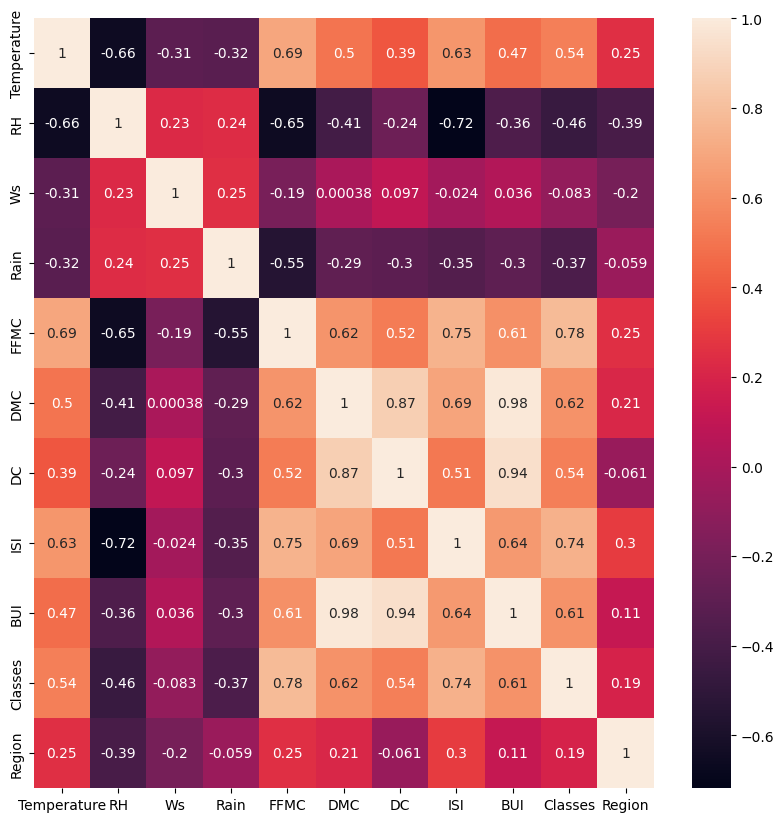

In [21]:
corr=X_train.corr()
print(corr)

#visualizing the corr
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)


In [27]:
# get the ajusted threshold for correlated values 

def correlation(dataset,threshold_value):
    col_corr=set() # to get unique values
    correlated_data=dataset.corr()
    for i in range(len(correlated_data.columns)):
        for j in range(i) :
            if abs(correlated_data.iloc[i,j])> threshold_value:
                colname=correlated_data.columns[i]
                col_corr.add(colname)
    return col_corr

correlation(X_train,0.90)


{'BUI'}

##### dropping the features according to correlation threshold

In [30]:
drop_feature=correlation(X_train,0.85)

X_train=X_train.drop(drop_feature,axis=1)
X_test=X_test.drop(drop_feature,axis=1)
print(X_train.shape,X_test.shape)

(182, 9) (61, 9)


##### feature scaling or standardrization


In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### before and after standardrization

Text(0.5, 1.0, 'After')

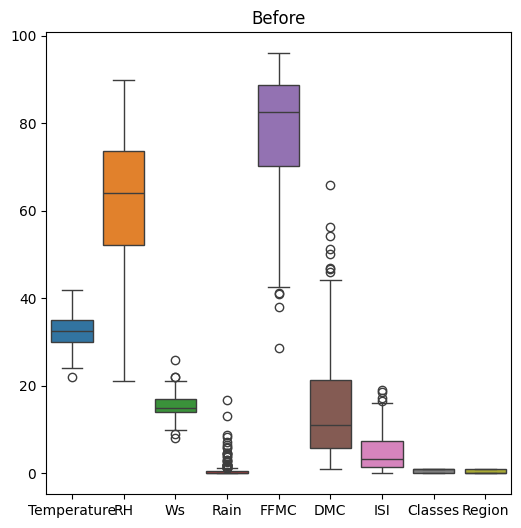

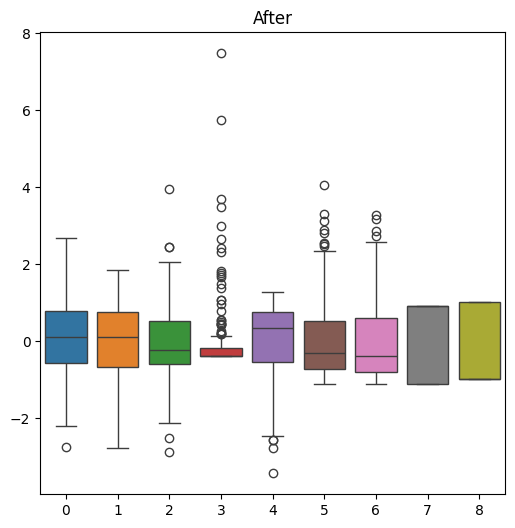

In [44]:
plt.subplots(figsize=(6,6))
sns.boxplot(data=X_train)
plt.title("Before")

plt.subplots(figsize=(6,6))
sns.boxplot(data=X_train_scaled)
plt.title("After")

### Linear Regression Model


r2 score 0.9847657384266951
mean absolute erroe 0.5468236465249978


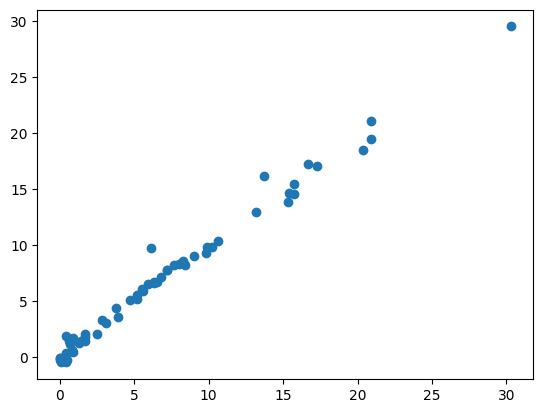

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)


score=r2_score(y_test,y_pred)
print("r2 score",score)
mae=mean_absolute_error(y_test,y_pred)
print("mean absolute erroe",mae)

plt.scatter(y_test,y_pred)

### Ridge resgression model

In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error

ridgereg=Ridge()
ridgereg.fit(X_train_scaled,y_train)
y_pred=ridgereg.predict(X_test_scaled)


score=r2_score(y_test,y_pred)
print("r2 score",score)
mae=mean_absolute_error(y_test,y_pred)
print("mean absolute erroe",mae)

r2 score 0.9842993364555512
mean absolute erroe 0.5642305340105715


### Lasso regression model

In [56]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error

lassoreg=Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred=lassoreg.predict(X_test_scaled)


score=r2_score(y_test,y_pred)
print("r2 score",score)
mae=mean_absolute_error(y_test,y_pred)
print("mean absolute erroe",mae)

r2 score 0.9492020263112388
mean absolute erroe 1.1331759949144087


### Elastic net

r2 score 0.8753460589519703
mean absolute erroe 1.8822353634895999


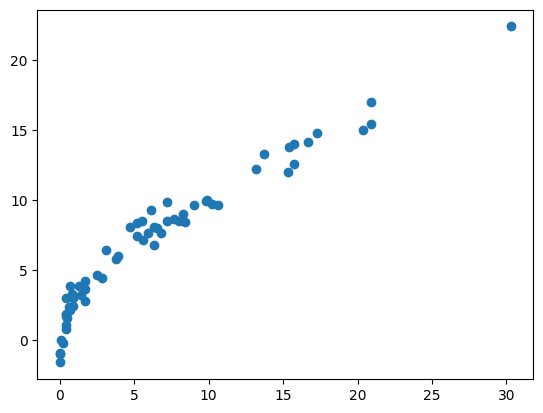

In [ ]:
#combining both ridge and lassr regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)


score=r2_score(y_test,y_pred)
print("r2 score",score)
mae=mean_absolute_error(y_test,y_pred)
print("mean absolute erroe",mae)

plt.scatter(y_test,y_pred)

### Hyperparameter tuning 


In [ ]:
#cross validation
